# **Principal Component Analysis (PCA) on Heart Attack Risk Dataset**

---
##  **Objective**
The goal of this project is to apply **Principal Component Analysis (PCA)** to reduce dimensionality in a **heart attack risk dataset** while retaining key information. PCA helps in **visualizing high-dimensional data** and selecting the most influential features.

---

Load the Dataset

We begin by **Importing necessary liabraries and then loading the dataset** from the specified path and inspecting its structure.

---

In [367]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file_path = 'heart_attack_prediction_dataset.csv'  
df = pd.read_csv(file_path)

##  Data Preprocessing

### 
- **Dropped unnecessary columns** (`Patient ID`, `Country`, `Continent`, `Hemisphere`)

In [369]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"], errors="ignore")
df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


- **Converted categorical variables**:
  - `"Sex"` → `0 (Male)`, `1 (Female)`
  - `"Diet"` → Encoded numerically

In [370]:
# Convert 'Sex' to numeric values (0 = Male, 1 = Female)
df_cleaned["Sex"] = df_cleaned["Sex"].map({"Male": 0, "Female": 1})

# Encode categorical variable 'Diet' if it exists
if "Diet" in df_cleaned.columns:
    label_encoder = LabelEncoder()
    df_cleaned["Diet"] = label_encoder.fit_transform(df_cleaned["Diet"])

df_cleaned.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,0,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,0,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,1,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,0,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,0,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


- **Handled Blood Pressure** by **splitting Systolic & Diastolic values**

In [371]:
# Handle 'Blood Pressure' - Split into Systolic and Diastolic
if "Blood Pressure" in df_cleaned.columns:
    df_cleaned[['Systolic BP', 'Diastolic BP']] = df_cleaned['Blood Pressure'].str.split('/', expand=True).astype(float)
    df_cleaned.drop(columns=['Blood Pressure'], inplace=True)

df_cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


- **Checked for missing values** and **imputed if necessary**

In [372]:
# Ensure all values are numeric and drop any non-numeric columns
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

df_cleaned.dropna(inplace=True)
df_cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91.0,88.0


In [373]:
# Separate features & target
features = df_cleaned.drop(columns=["Heart Attack Risk"])
target = df_cleaned["Heart Attack Risk"]

features.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic BP,Diastolic BP
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,261404,31.251233,286,0,6,158.0,88.0
1,21,0,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,285768,27.194973,235,1,7,165.0,93.0
2,21,1,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,235282,28.176571,587,4,4,174.0,99.0
3,84,0,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,125640,36.464704,378,3,4,163.0,100.0
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,160555,21.809144,231,1,5,91.0,88.0


In [374]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

- **Standardized the dataset** using `StandardScaler()`

In [375]:
# Standardize the Features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)


## 📉 **Apply PCA**

### 🏗 **Process**
- Applied **PCA to all features**.


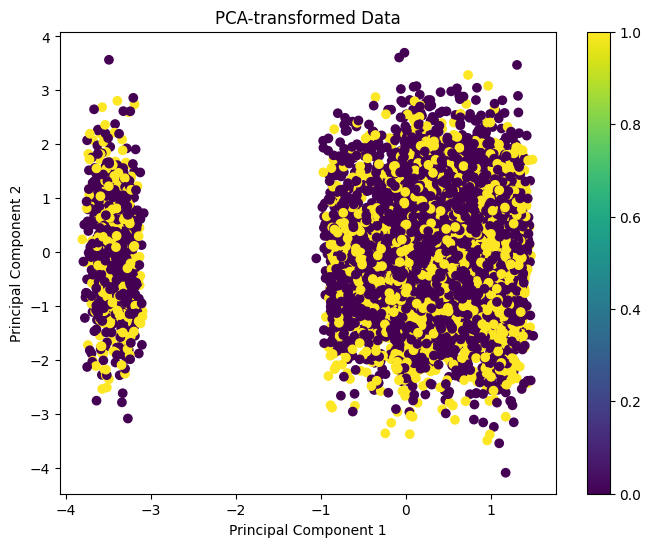

In [376]:
# Apply PCA to analyze variance retention 
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_transformed = pca.fit_transform(scaled_data)


# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-transformed Data')
plt.colorbar()
plt.show()

In [377]:
# Ensure all values are numeric and drop any non-numeric columns
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='any')

# Identify Key Features Contributing to PCA
feature_importance = pd.DataFrame(
    data=pca.components_,
    columns=df_numeric.columns,
    index=["PC1", "PC2"]
)

print("\n🔹 Key Features Contributing to PCA:")
print(feature_importance.T.sort_values(by="PC1", ascending=False))  # Sort by most influential features


🔹 Key Features Contributing to PCA:
                                      PC1       PC2
Smoking                          0.700732  0.001818
Age                              0.436343 -0.082346
Sedentary Hours Per Day          0.030548  0.117103
Family History                   0.019165 -0.122308
Cholesterol                      0.017710  0.424424
Alcohol Consumption              0.010316  0.001890
Triglycerides                    0.009159 -0.284525
Income                           0.004031 -0.105409
BMI                              0.003773  0.166169
Heart Attack Risk                0.002877 -0.062588
Previous Heart Problems          0.001502  0.238803
Obesity                          0.000234 -0.209128
Exercise Hours Per Week         -0.004512  0.245792
Diabetes                        -0.005743 -0.223911
Stress Level                    -0.008545 -0.402948
Sleep Hours Per Day             -0.012513  0.368147
Physical Activity Days Per Week -0.012933  0.235517
Systolic BP                